In [1]:
import geopandas as gpd
import os
import warnings

import cambium_tools as ct
from cambium_tools import Read_Dataset

In [2]:
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
from rasterio.mask import mask

##### Obtaining Corrientes Province

In [ ]:
## Obtaining Corrientes Province from Instituto Geográfico Nacional of Agentina (https://www.ign.gob.ar/)
url = 'https://dnsg.ign.gob.ar/apps/api/v1/capas-sig/Geodesia+y+demarcaci%C3%B3n/L%C3%ADmites/provincia/shp'

gdf = Read_Dataset(url).gdf

# Selecting Corrientes province and saving it into an ESRI_shapefile
prov_corrientes = gdf.loc[gdf['nam']=='Corrientes']
prov_corrientes.to_file('data\Layers\corrientes.shp')

## Trying analysis GIS with rasterio

### Merging and clipping ALOS DMS

In [4]:
alos_1 = rasterio.open('data\Layers\ALOS\ALOS-0000000000-0000000000.tif')
alos_2 = rasterio.open('data\Layers\ALOS\ALOS-0000000000-0000046592.tif')

In [6]:
merge([alos_1, alos_2], dst_path='data/Layers/ALOS/merged_alos.tif')

In [7]:
merged_alos = rasterio.open('data/Layers/ALOS/merged_alos.tif')

In [5]:
def getFeatures_for_clipping(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

corriente_coords = getFeatures_for_clipping(corrientes)

# _alos_clip, alos_transform = mask(merged_alos, shapes=corriente_coords, crop=True, nodata=0)

In [31]:
# we need to modify the metadata. Let’s start by copying the metadata from the original data file.
alos_meta = merged_alos.meta.copy()

# Next we need to parse the EPSG value from the CRS so that we can create a Proj4 string using PyCRS 
# library (to ensure that the projection information is saved correctly)
epsg_code = int(merged_alos.crs.data['init'][5:])

# Now we need to update the metadata with new dimensions, transform (affine) and CRS (as Proj4 text)
alos_meta.update({"driver": "GTiff",
                  "height": _alos_clip.shape[1],
                  "width": _alos_clip.shape[2],
                  "transform": alos_transform
                  # "crs": pycrs.parser.from_epsg_code(epsg_code).to_proj4()
                 })


In [32]:
out_alo = r"C:\Users\Usuario\Documents\gdd-test-MGJ\data\Layers\ALOS\clipped_ALOS.tif"

with rasterio.open(out_alo, "w", **alos_meta) as dest:
    dest.write(_alos_clip)

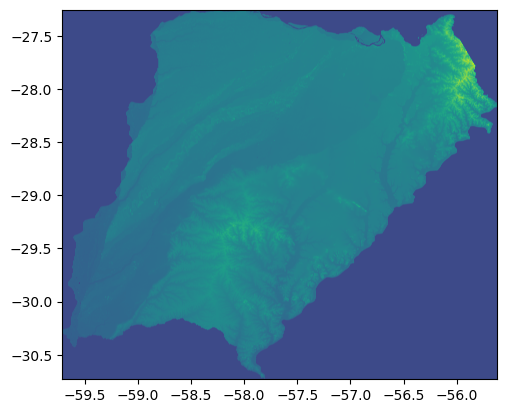

<Axes: >

In [36]:
alos_clip = rasterio.open(out_alo)
show(alos_clip)

### Merging and clipping HAND DMS

In [4]:
hand_1 = rasterio.open(r'C:\Users\Usuario\Documents\gdd-test-MGJ\data\Layers\HAND\HAND-0000000000-0000000000.tif')
hand_2 = rasterio.open(r'C:\Users\Usuario\Documents\gdd-test-MGJ\data\Layers\HAND\HAND-0000000000-0000032768.tif')
hand_3 = rasterio.open(r'C:\Users\Usuario\Documents\gdd-test-MGJ\data\Layers\HAND\HAND-0000032768-0000000000.tif')
hand_4 = rasterio.open(r'C:\Users\Usuario\Documents\gdd-test-MGJ\data\Layers\HAND\HAND-0000032768-0000032768.tif')

In [5]:
merge([hand_1, hand_2, hand_3, hand_4], dst_path='data\Layers\HAND\merged_hand.tif')

In [5]:
merged_hand = rasterio.open('data/Layers/HAND/merged_hand.tif')
_hand_clip, hand_transform = mask(merged_hand, shapes=corriente_coords, crop=True, nodata=0)

In [8]:
# we need to modify the metadata. Let’s start by copying the metadata from the original data file.
hand_meta = merged_hand.meta.copy()

# Next we need to parse the EPSG value from the CRS so that we can create a Proj4 string using PyCRS 
# library (to ensure that the projection information is saved correctly)
epsg_code = int(merged_hand.crs.data['init'][5:])

# Now we need to update the metadata with new dimensions, transform (affine) and CRS (as Proj4 text)
hand_meta.update({"driver": "GTiff",
                  "height": _hand_clip.shape[1],
                  "width": _hand_clip.shape[2],
                  "transform": hand_transform,
                  "nodata":None
                  # "crs": pycrs.parser.from_epsg_code(epsg_code).to_proj4()
                 })


In [9]:
out_hand = r"C:\Users\Usuario\Documents\gdd-test-MGJ\data\Layers\HAND\clipped_HAND.tif"

with rasterio.open(out_hand, "w", **hand_meta) as dest:
    dest.write(_hand_clip)

In [10]:
hand_clip = rasterio.open(out_hand)

In [12]:
show(hand_clip)

### Clipping Land Cover

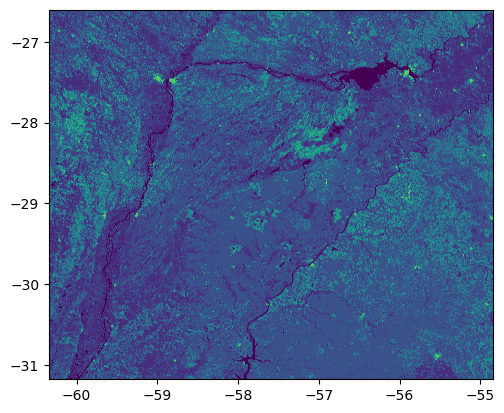

<Axes: >

In [3]:
land_cover = rasterio.open(r'C:\Users\Usuario\Documents\gdd-test-MGJ\data\Layers\Dynamic_World_2020.tif')
show(land_cover)

In [6]:
_land_clip, land_transform = mask(land_cover, shapes=corriente_coords, crop=True, nodata=0)

In [7]:
# we need to modify the metadata. Let’s start by copying the metadata from the original data file.
land_meta = land_cover.meta.copy()

# Next we need to parse the EPSG value from the CRS so that we can create a Proj4 string using PyCRS 
# library (to ensure that the projection information is saved correctly)
epsg_code = int(land_cover.crs.data['init'][5:])

# Now we need to update the metadata with new dimensions, transform (affine) and CRS (as Proj4 text)
land_meta.update({"driver": "GTiff",
                  "height": _land_clip.shape[1],
                  "width": _land_clip.shape[2],
                  "transform": land_transform
                  # "crs": pycrs.parser.from_epsg_code(epsg_code).to_proj4()
                 })


In [8]:
out_land = r"C:\Users\Usuario\Documents\gdd-test-MGJ\data\Layers\clipped_DW.tif"

with rasterio.open(out_land, "w", **land_meta) as dest:
    dest.write(_land_clip)

In [9]:
land_cover = rasterio.open(out_land)

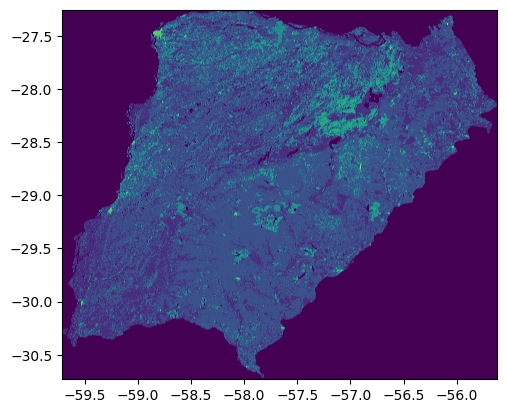

<Axes: >

In [10]:
show(land_cover)